<a href="https://colab.research.google.com/github/aditipriya25/ISRO/blob/main/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~!.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 601M/612M [00:07<00:00, 45.9MB/s]
100% 612M/612M [00:07<00:00, 80.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

Assigning path for dataset

In [ ]:
data_dr = '/content/gtsrb-german-traffic-sign.zip'
train_path = '/content/Train'
test_path = '/content/Test'
img_height = 30
img_width = 30
channels = 3

Total Class

In [ ]:
num_categories = len(os.listdir(train_path))
num_categories

43

In [ ]:
classes = {
    0: 'Speed Limit (20km/h)',
    1: 'Speed Limit (30km/h)',
    2: 'Speed Limit (40km/h)',
    3: 'Speed Limit (50km/h)',
    4: 'Speed Limit (60km/h)',
    5: 'Speed Limit (70km/h)',
    6: 'Speed Limit (80km/h)',
    7: 'End of Speed Limit (80km/h)',
    8: 'Speed Limit (100km/h)',
    9: 'Speed Limit (120km/h)',
    10: 'No Passing',
    11: 'No Passing Vehicles Over 3.5 Tons',
    12: 'Right of Way at Intersection (40km/h)',
    13: 'Priority Road',
    14: 'Yield',
    15: 'Stop',
    16: ' No Vehicles',
    17: ' Vehicles > 3.5 Tons Prohibited ',
    18: ' No Entry',
    19: ' General Caution',
    20: ' Dangerous Curve Left',
    21: 'Dangerous Curve Right',
    22: 'Double Curve',
    23: 'Bumpy Road',
    24: 'Slippery Road',
    25: 'Road narrows in the right',
    26: 'Road Work',
    27: 'Traffic Signals',
    28: 'Pedestrians',
    29: 'Children Crossing',
    30: 'Bicycles Crossing',
    31: 'Beware of ice/snow',
    32: 'Wild Animals Crossing',
    33: 'End speed + passing limits',
    34: 'Turn Right Ahead',
    35: 'Turn Left Ahead',
    36: 'Ahead Only',
    37: 'Go Straight or Right',
    38: 'Go Straight or Left',
    39: 'Keep Right',
    40: 'Keep Left',
    41: 'Roundabout mandatory',
    42: 'End of no passing',
    43: 'End of no passing vehicles > 3.5 tons'
}

Visualizing Dataset

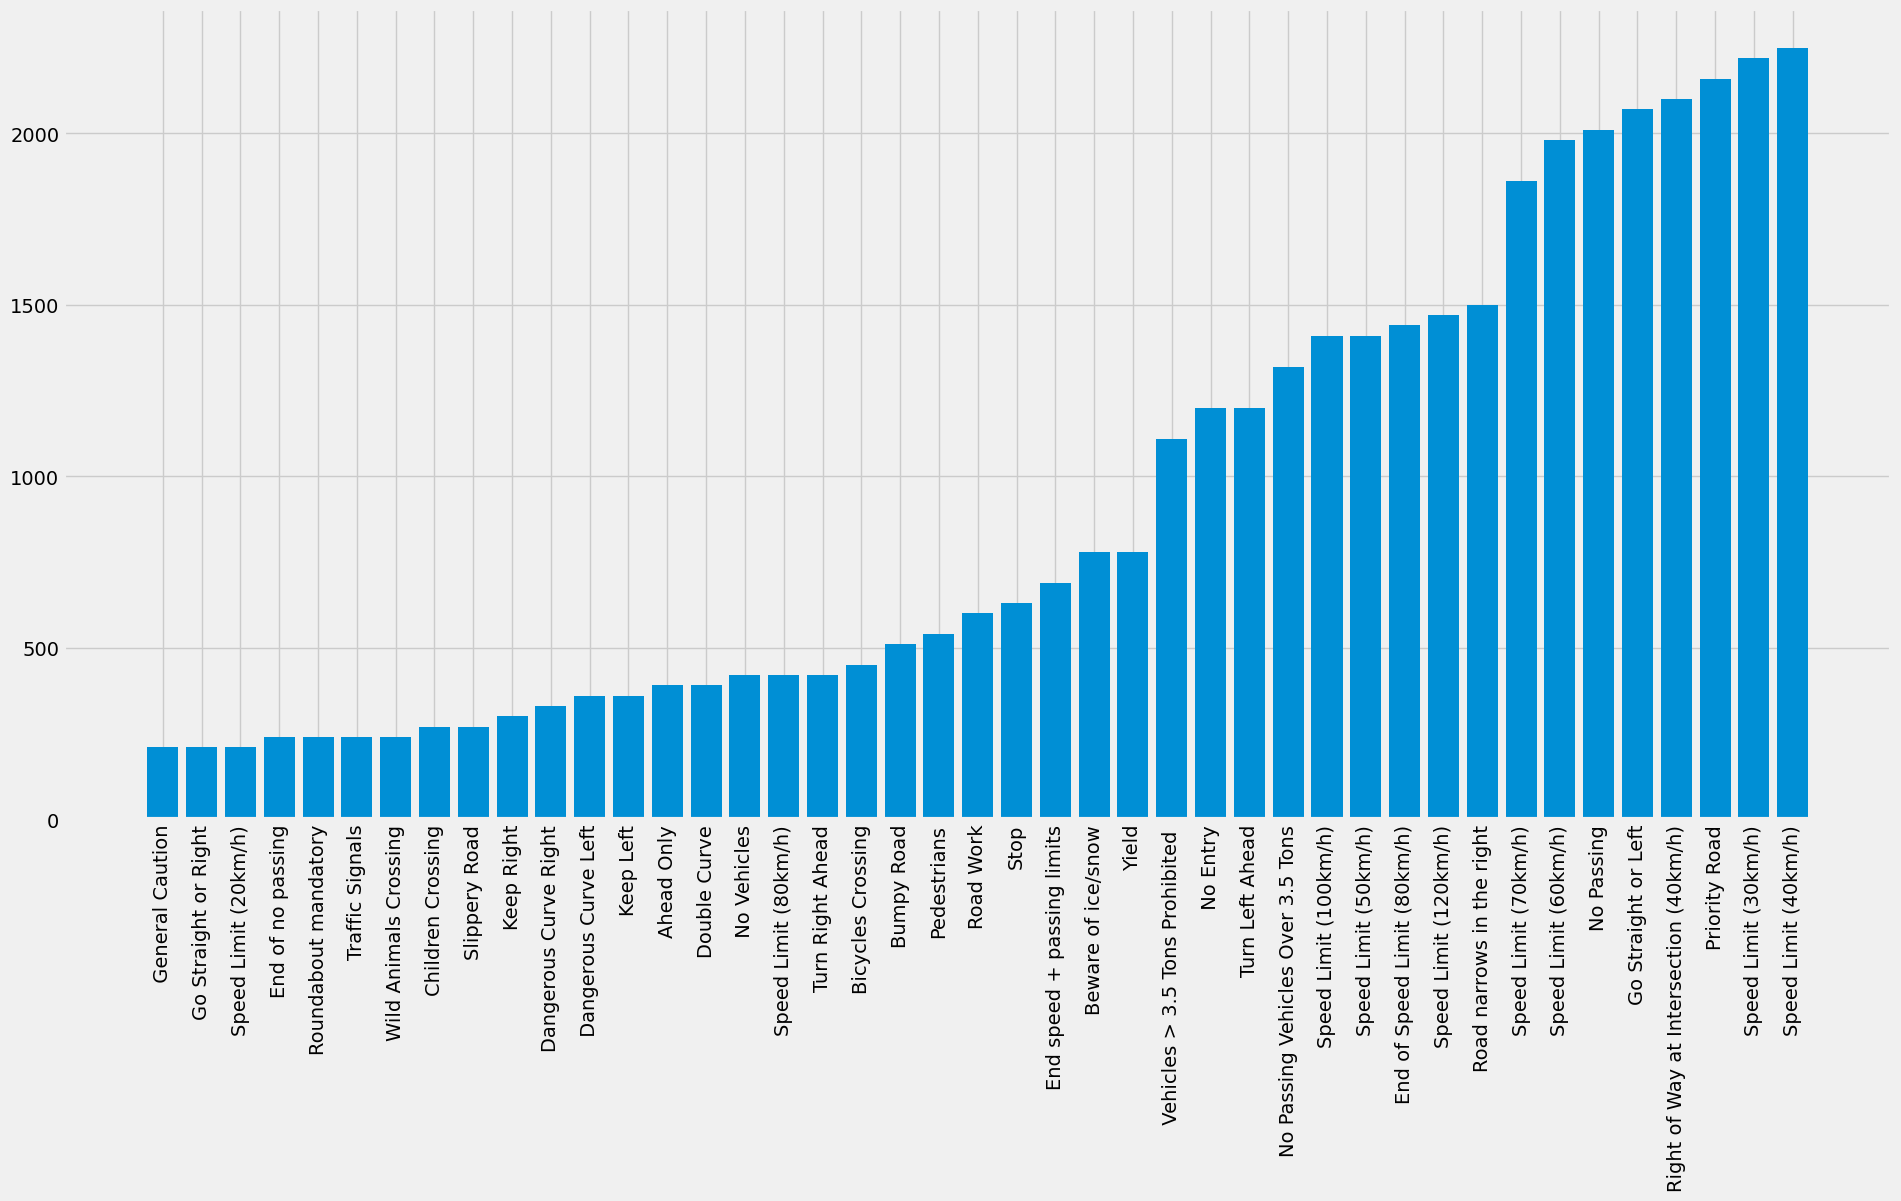

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
  train_files = os.listdir(train_path + '/' + folder)
  train_number.append(len(train_files))
  class_num.append(classes[int(folder)])

zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in tuples]

plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

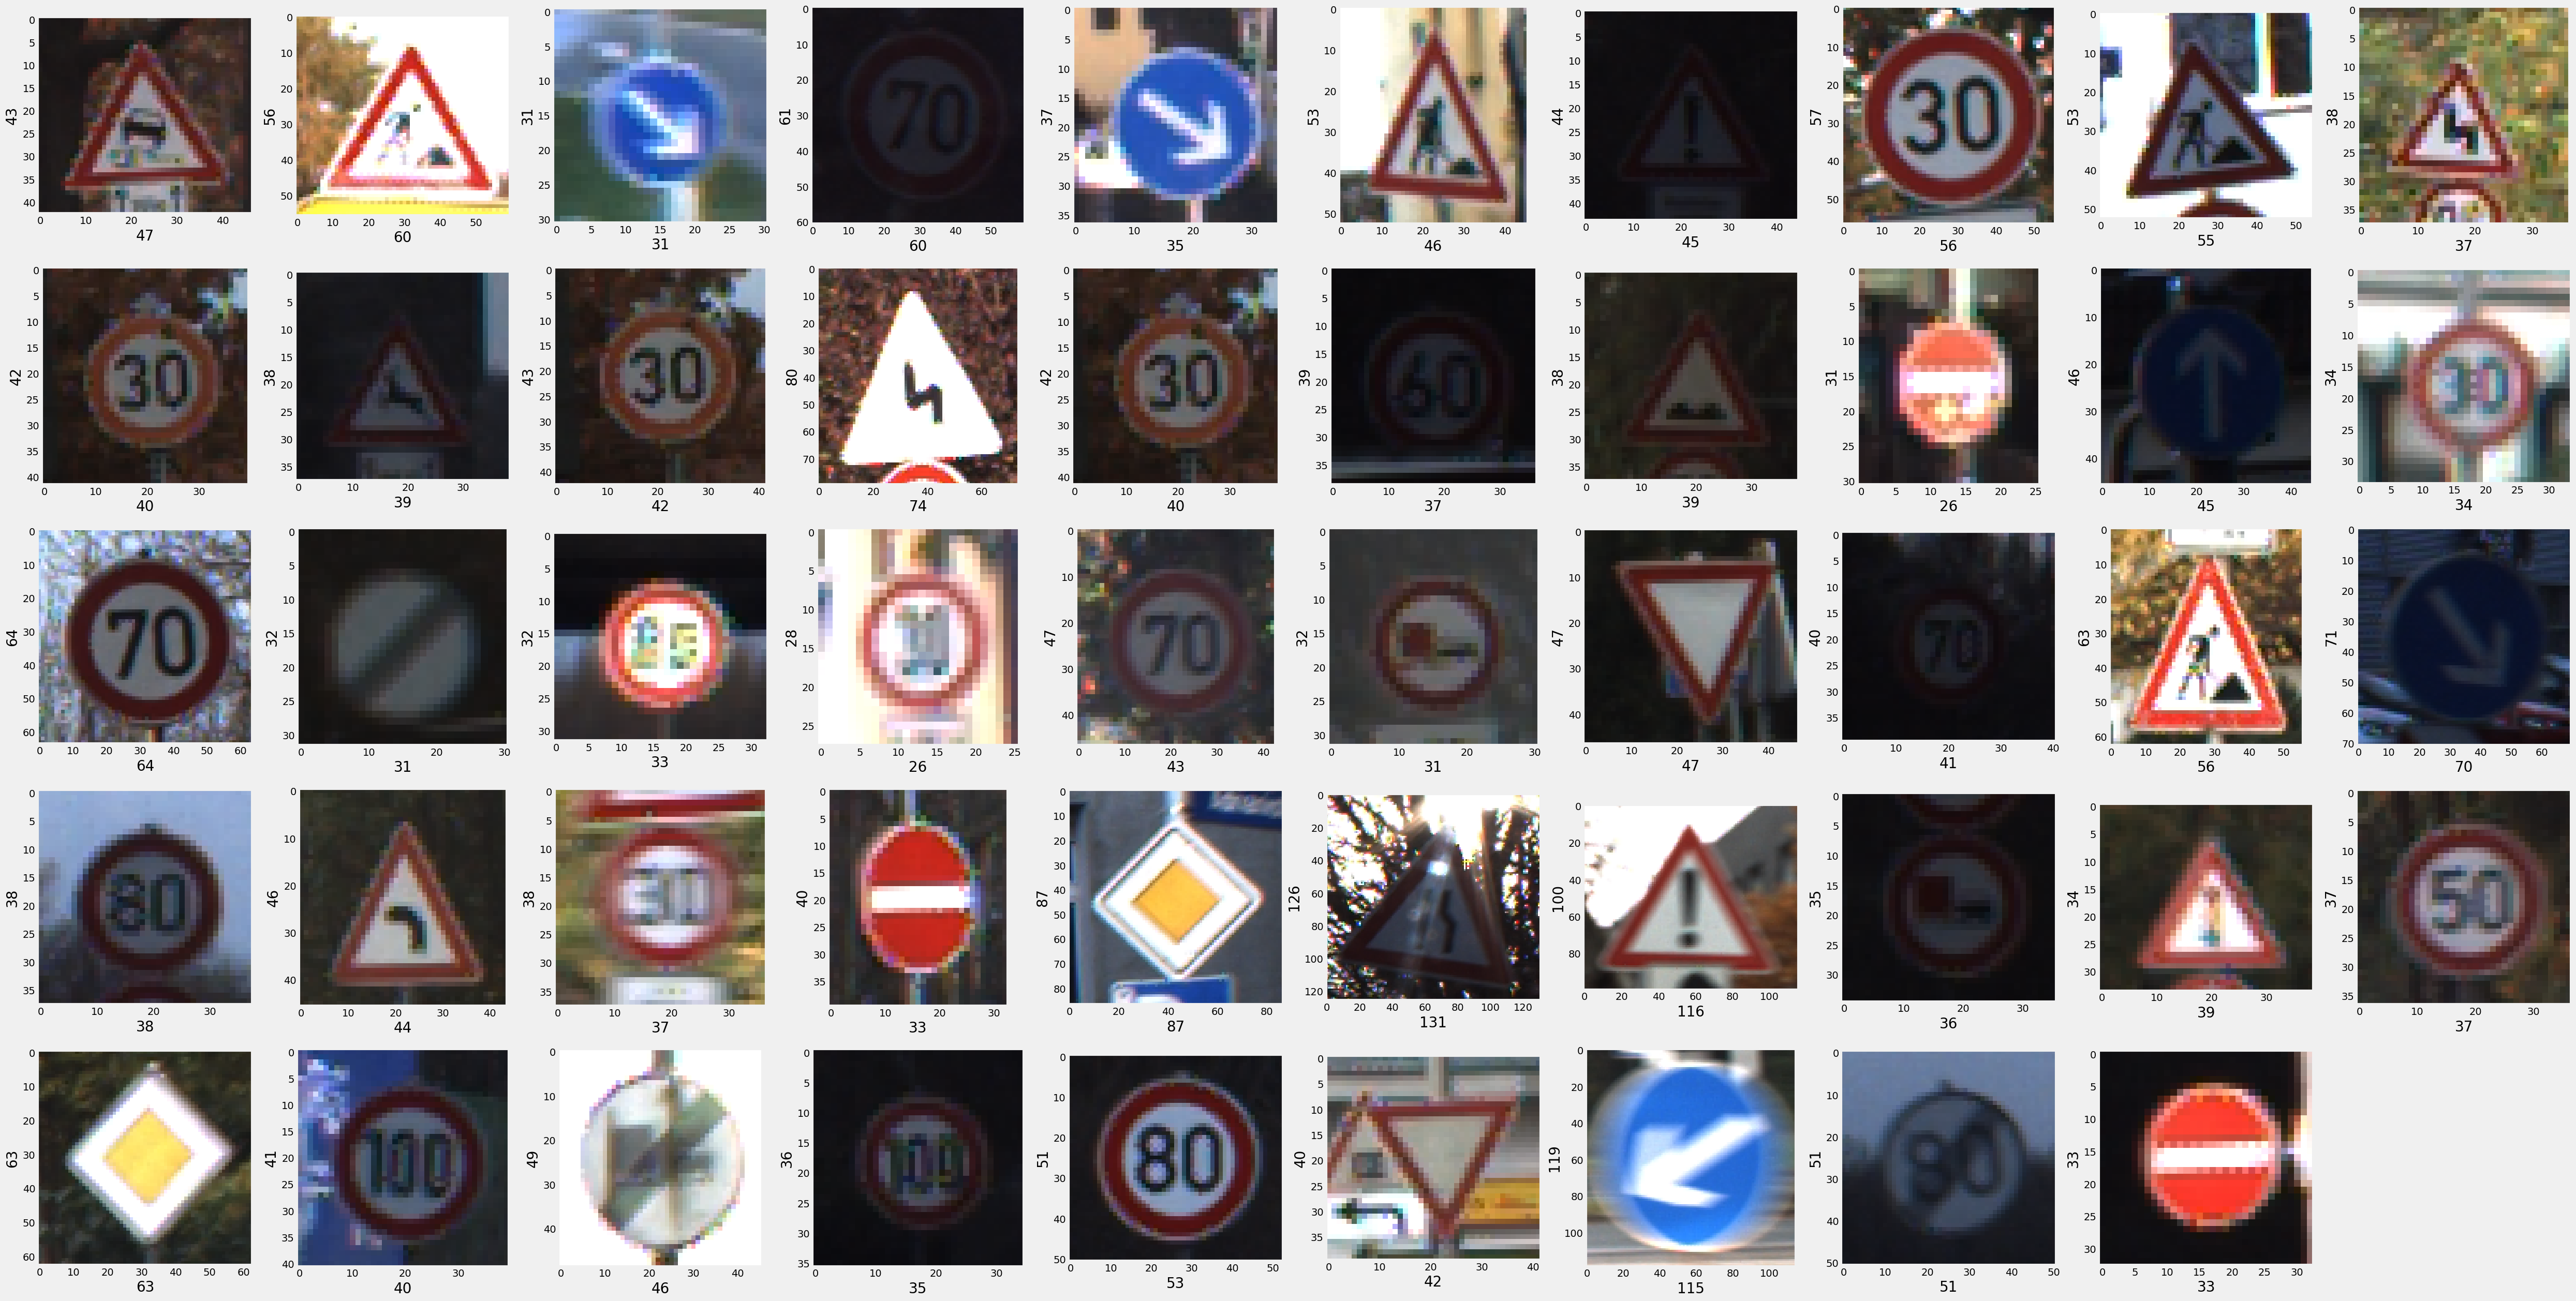

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import zipfile

data_dr = '/content/gtsrb-german-traffic-sign.zip'
with zipfile.ZipFile(data_dr, 'r') as zip_ref:
    with zip_ref.open('Test.csv') as csv_file:
        test = pd.read_csv(csv_file)
    imgs = test["Path"].values

    plt.figure(figsize=(50, 50))

    for i in range(1, 50):
        plt.subplot(10, 10, i)
        img_name = random.choice(imgs)
        with zip_ref.open(img_name) as img_file:
            rand_img = imread(img_file)
        plt.imshow(rand_img)
        plt.grid(False)
        plt.xlabel(rand_img.shape[1], fontsize=20)
        plt.ylabel(rand_img.shape[0], fontsize=20)
    plt.tight_layout()
    plt.show()

Collecting Training Data

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import zipfile
import os
from PIL import Image
import numpy as np

data_dr = '/content/gtsrb-german-traffic-sign.zip'
img_width = 30
img_height = 30
num_categories = 43
image_data = []
image_labels = []

with zipfile.ZipFile(data_dr, 'r') as zip_ref:
    for i in range(num_categories):
        path = 'Train/' + str(i)
        images = zip_ref.namelist()
        images_in_folder = [img for img in images if img.startswith(path)]

        for img in images_in_folder:
            try:
                with zip_ref.open(img) as img_file:
                    image = Image.open(img_file)
                    image_fromarray = Image.fromarray(image, 'RGB')
                    resize_image = image_fromarray.resize((img_height, img_width))
                    image_data.append(np.array(resize_image))
                    image_labels.append(i)
            except:
                print("Error in " + img)

image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

Streaming output truncated to the last 5000 lines.
Error in Train/35/00035_00000_00011.png
Error in Train/35/00035_00000_00012.png
Error in Train/35/00035_00000_00013.png
Error in Train/35/00035_00000_00014.png
Error in Train/35/00035_00000_00015.png
Error in Train/35/00035_00000_00016.png
Error in Train/35/00035_00000_00017.png
Error in Train/35/00035_00000_00018.png
Error in Train/35/00035_00000_00019.png
Error in Train/35/00035_00000_00020.png
Error in Train/35/00035_00000_00021.png
Error in Train/35/00035_00000_00022.png
Error in Train/35/00035_00000_00023.png
Error in Train/35/00035_00000_00024.png
Error in Train/35/00035_00000_00025.png
Error in Train/35/00035_00000_00026.png
Error in Train/35/00035_00000_00027.png
Error in Train/35/00035_00000_00028.png
Error in Train/35/00035_00000_00029.png
Error in Train/35/00035_00001_00000.png
Error in Train/35/00035_00001_00001.png
Error in Train/35/00035_00001_00002.png
Error in Train/35/00035_00001_00003.png
Error in Train/35/00035_00001

Shuffling of data

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

Splitting of data

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import zipfile
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split

data_dr = '/content/gtsrb-german-traffic-sign.zip'
img_width = 30
img_height = 30
num_categories = 43
image_data = []
image_labels = []

with zipfile.ZipFile(data_dr, 'r') as zip_ref:
    for i in range(num_categories):
        path = 'Train/' + str(i)
        images = zip_ref.namelist()
        images_in_folder = [img for img in images if img.startswith(path)]

        for img in images_in_folder:
            try:
                with zip_ref.open(img) as img_file:
                    image = Image.open(img_file)
                    # Convert to RGB explicitly if the image is not in RGB format
                    image = image.convert('RGB')
                    image_fromarray = Image.fromarray(np.array(image), 'RGB')
                    resize_image = image_fromarray.resize((img_height, img_width))
                    image_data.append(np.array(resize_image))
                    image_labels.append(i)
            except Exception as e:
                print("Error in " + img + ": " + str(e)) # Print the error for debugging

image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

X_train, X_val, Y_train, Y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)
X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_val.shape", X_val.shape)
print("Y_train.shape", Y_train.shape)
print("Y_val.shape", Y_val.shape)

(63748, 30, 30, 3) (63748,)
X_train.shape (44623, 30, 30, 3)
X_val.shape (19125, 30, 30, 3)
Y_train.shape (44623,)
Y_val.shape (19125,)


In [ ]:
Y_train = keras.utils.to_categorical(Y_train, num_categories)
Y_val = keras.utils.to_categorical(Y_val, num_categories)
print(Y_train.shape)
print(Y_val.shape)

(44623, 43)
(19125, 43)


In [ ]:
# CNN MODEL
model = keras.models.Sequential([
keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(img_height,img_width,channels)),
keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2,2)),
keras.layers.BatchNormalization(axis=-1),
keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(img_height,img_width,channels)),
keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2,2)),
keras.layers.BatchNormalization(axis=-1),
keras.layers.Flatten(),
keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(rate=0.5),
keras.layers.Dense(43, activation='softmax')
])

In [ ]:
# Define the initial learning rate
lr = 0.001  # Set this to your desired learning rate

# Define the number of epochs for training
epochs = 30 # Set this to your desired number of epochs

# Use learning_rate_schedule instead of decay
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=lr,
    decay_steps=epochs * 0.5,  # Adjust decay steps as needed
    decay_rate=0.5            # Adjust decay rate as needed
)

opt = Adam(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")
history = model.fit(aug.flow(X_train, Y_train, batch_size=32), validation_data=(X_val, Y_val), epochs=epochs)

Epoch 1/30
1395/1395 [==============================] - 196s 138ms/step - loss: 3.6068 - accuracy: 0.1803 - val_loss: 2.7747 - val_accuracy: 0.2940
Epoch 2/30
1395/1395 [==============================] - 222s 159ms/step - loss: 3.5658 - accuracy: 0.1849 - val_loss: 2.7777 - val_accuracy: 0.2951
Epoch 3/30
1395/1395 [==============================] - 194s 139ms/step - loss: 3.5578 - accuracy: 0.1838 - val_loss: 2.7828 - val_accuracy: 0.2952
Epoch 4/30
1395/1395 [==============================] - 193s 138ms/step - loss: 3.5652 - accuracy: 0.1848 - val_loss: 2.7731 - val_accuracy: 0.2941
Epoch 5/30
1395/1395 [==============================] - 197s 141ms/step - loss: 3.5754 - accuracy: 0.1846 - val_loss: 2.7853 - val_accuracy: 0.2929
Epoch 6/30
1395/1395 [==============================] - 199s 142ms/step - loss: 3.5723 - accuracy: 0.1817 - val_loss: 2.7734 - val_accuracy: 0.2949
Epoch 7/30
1395/1395 [==============================] - 195s 140ms/step - loss: 3.5691 - accuracy: 0.1807 - val_

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


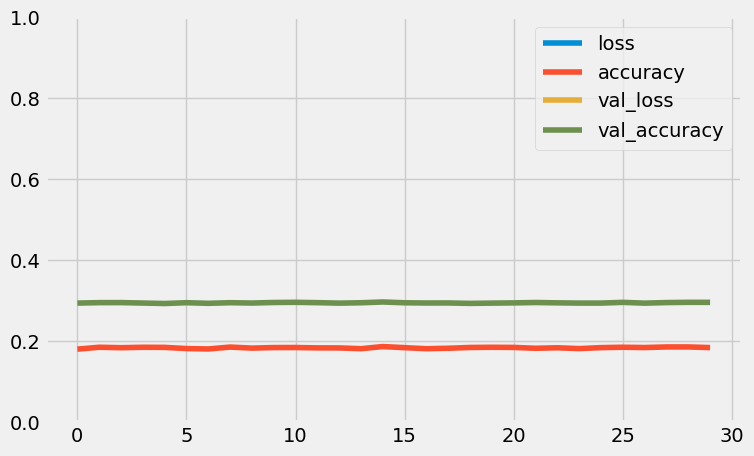

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

       loss  accuracy  val_loss  val_accuracy
0  3.606755  0.180288  2.774709      0.293961
1  3.565840  0.184882  2.777673      0.295059
2  3.557845  0.183784  2.782815      0.295163
3  3.565248  0.184837  2.773055      0.294065
4  3.575375  0.184591  2.785287      0.292915


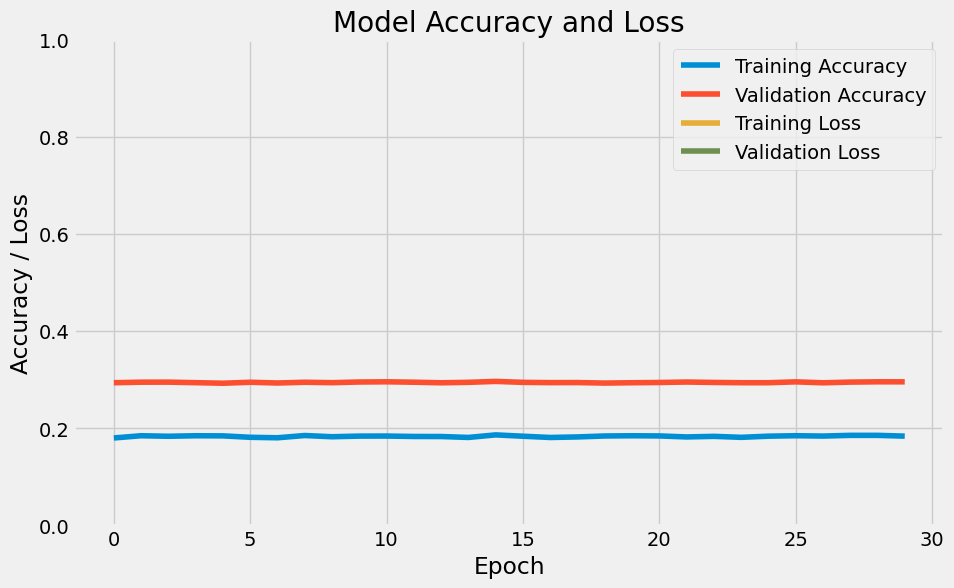

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'history' is the training history object obtained from model training
history_dict = history.history
history_df = pd.DataFrame(history_dict)

# Print out the first few rows of the DataFrame to inspect the data
print(history_df.head())

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot training & validation accuracy values
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
# Plot training & validation loss values
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')

plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend(loc='best')
plt.grid(True)
plt.ylim(0, 1)
plt.show()


Keys of history dict: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Sample data: {'loss': [3.6067545413970947, 3.565840244293213, 3.557844638824463, 3.565248489379883, 3.5753753185272217], 'accuracy': [0.1802881956100464, 0.1848822385072708, 0.1837841421365738, 0.18483741581439972, 0.1845909059047699], 'val_loss': [2.7747089862823486, 2.7776730060577393, 2.7828149795532227, 2.773054838180542, 2.7852866649627686], 'val_accuracy': [0.2939607799053192, 0.29505881667137146, 0.2951633930206299, 0.29406535625457764, 0.2929150462150574]}
       loss  accuracy  val_loss  val_accuracy
0  3.606755  0.180288  2.774709      0.293961
1  3.565840  0.184882  2.777673      0.295059
2  3.557845  0.183784  2.782815      0.295163
3  3.565248  0.184837  2.773055      0.294065
4  3.575375  0.184591  2.785287      0.292915


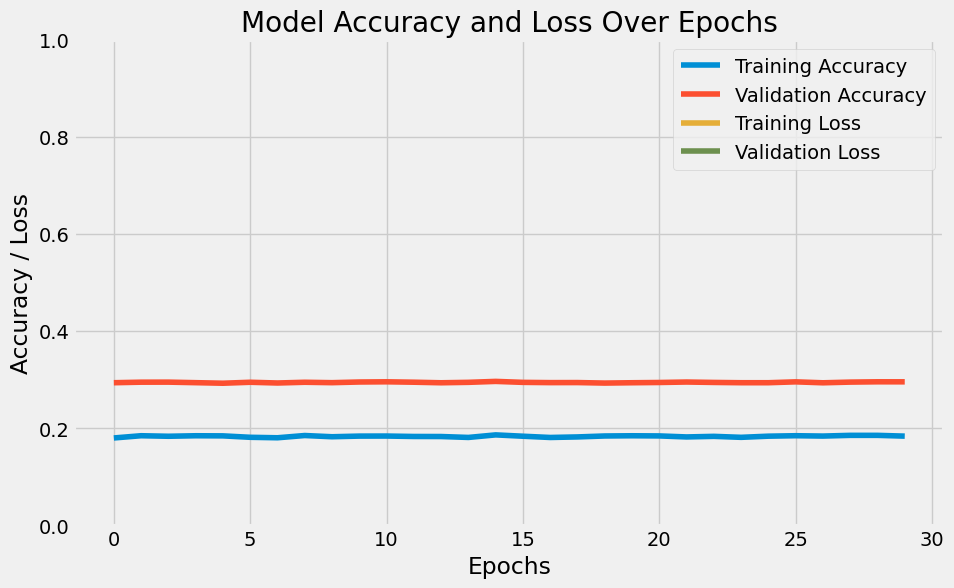

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'history' is the training history object obtained from model training
# Let's inspect the history object first
history_dict = history.history
print("Keys of history dict:", history_dict.keys())
print("Sample data:", {k: v[:5] for k, v in history_dict.items()})  # Print first 5 values of each metric to inspect

# Convert the history dict to a DataFrame for easier handling
history_df = pd.DataFrame(history_dict)

# Print the first few rows of the DataFrame to ensure data is loaded correctly
print(history_df.head())

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot training & validation accuracy values
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
# Plot training & validation loss values
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')

plt.title('Model Accuracy and Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend(loc='best')
plt.grid(True)
plt.ylim(0, 1)
plt.show()
